<a href="https://colab.research.google.com/github/shumshersubashgautam/KU-Research-Gait_Analysis/blob/main/gaitanalysis_lowdata_358_sample_val_acc_94_90_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import drive 
 drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!cp /content/gdrive/MyDrive/gait-final-joint-angles-dataset.csv /content/gaitphase/

In [117]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/content/gaitphase/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gaitphase/gait-final-joint-angles-dataset.csv


In [118]:
import warnings
warnings.filterwarnings('ignore')

In [119]:
data = '/content/358.csv'

df = pd.read_csv(data)

In [120]:
df.shape

(357, 4)

In [121]:
df.head()

,knee-angle,hip-angle,ankle-angle,gait-cycle-phase
0,8.542219,3.695854,74.964765,0
1,8.132742,1.848410,76.437716,0
2,7.346290,0.199422,76.980227,0
3,7.938976,0.237658,78.013589,0
4,11.537455,2.506330,79.842429,0


In [122]:
df.columns

Index(['knee-angle', 'hip-angle', 'ankle-angle', 'gait-cycle-phase'], dtype='object')

In [125]:
X = df.drop(['gait-cycle-phase'], axis=1)

y = df['gait-cycle-phase']

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [127]:
X_train.shape, X_test.shape

((285, 3), (72, 3))

In [128]:
cols = X_train.columns

In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [130]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [131]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [132]:
X_train.describe()

,knee-angle,hip-angle,ankle-angle
count,2.850000e+02,2.850000e+02,2.850000e+02
mean,-8.102680e-17,-6.232831e-18,7.728710e-16
std,1.001759e+00,1.001759e+00,1.001759e+00
min,-1.359362e+00,-1.480581e+00,-2.299096e+00
25%,-7.807841e-01,-8.323223e-01,-7.741248e-01
50%,-4.187381e-01,-1.563435e-01,1.065243e-01
75%,7.680189e-01,7.986392e-01,7.931928e-01
max,2.344602e+00,2.009455e+00,2.456502e+00


In [133]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC() 
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.8472


In [134]:
svc=SVC(C=100.0) 
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('C=100.0 Model accuracy with rbf kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

C=100.0 Model accuracy with rbf kernel : 0.9028


In [135]:
linear_svc=SVC(kernel='linear', C=1.0) 
linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('C=1.0 Model accuracy with linear kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

C=1.0 Model accuracy with linear kernel : 0.8611


In [136]:
linear_svc=SVC(kernel='linear', C=10.0) 
linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('C=10.0 Model accuracy with linear kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

C=10.0 Model accuracy with linear kernel : 0.8750


In [137]:
linear_svc=SVC(kernel='linear', C=100.0) 
linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('C=100.0 Model accuracy with linear kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

C=100.0 Model accuracy with linear kernel : 0.8750


In [138]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[47  2]
 [ 7 16]]

True Positives(TP) =  47

True Negatives(TN) =  16

False Positives(FP) =  2

False Negatives(FN) =  7


<Axes: >

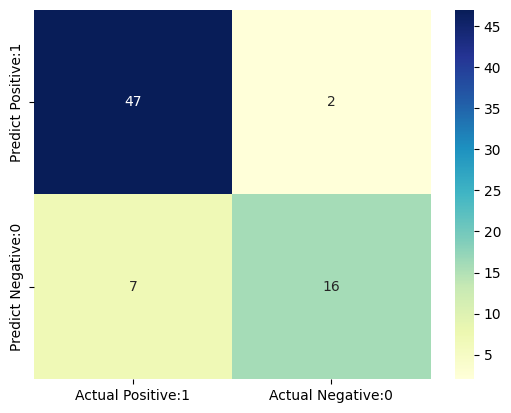

In [139]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [140]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        49
           1       0.89      0.70      0.78        23

    accuracy                           0.88        72
   macro avg       0.88      0.83      0.85        72
weighted avg       0.88      0.88      0.87        72



In [141]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [142]:
print('Cross-validation with linear kernel:\n\n{}'.format(linear_scores))

Cross-validation with linear kernel:

[0.875      0.90277778 0.92957746 0.87323944 0.92957746]


In [143]:
print('Average cross-validation with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average cross-validation with linear kernel:0.9020


In [144]:
rbf_svc=SVC(kernel='rbf')

rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [145]:
print('Cross-validation with rbf kernel:\n\n{}'.format(rbf_scores))

Cross-validation with rbf kernel:

[0.83333333 0.93055556 0.92957746 0.83098592 0.91549296]


In [146]:
print('Average cross-validation with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average cross-validation with rbf kernel:0.8880


In [147]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

svc=SVC() 


parameters = [ {'C':[1, 10, 50], 'kernel':['linear']},
               {'C':[1, 10, 50], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.5, 0.9]}
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 50], 'kernel': ['linear']},
                         {'C': [1, 10, 50], 'gamma': [0.1, 0.2, 0.5, 0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [148]:
print('GridSearch CV best: {:.4f}\n\n'.format(grid_search.best_score_))


print('Best results :','\n\n', (grid_search.best_params_))

GridSearch CV best: 0.9439


Best results : 

 {'C': 50, 'gamma': 0.2, 'kernel': 'rbf'}


In [149]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/content/gaitphase'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/gaitphase/gait-final-joint-angles-dataset.csv


In [150]:
df = pd.read_csv('/content/358.csv')

In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, classification_report, f1_score, average_precision_score, precision_recall_fscore_support, roc_auc_score)
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier 
import xgboost as XGB
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")

In [69]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.1 MB/s eta 0:00:00


In [152]:
df.head()

,knee-angle,hip-angle,ankle-angle,gait-cycle-phase
0,8.542219,3.695854,74.964765,0
1,8.132742,1.848410,76.437716,0
2,7.346290,0.199422,76.980227,0
3,7.938976,0.237658,78.013589,0
4,11.537455,2.506330,79.842429,0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   knee-angle        357 non-null    float64
 1   hip-angle         357 non-null    float64
 2   ankle-angle       357 non-null    float64
 3   gait-cycle-phase  357 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 11.3 KB


In [154]:
df.describe()

,knee-angle,hip-angle,ankle-angle,gait-cycle-phase
count,357.000000,357.000000,357.000000,357.000000
mean,24.120974,13.941802,72.401286,0.375350
std,17.980663,9.401818,10.876505,0.484893
min,0.239552,0.124438,47.544804,0.000000
25%,10.444161,5.749197,63.944754,0.000000
50%,16.768786,12.566302,73.386967,0.000000
75%,37.760503,21.507502,80.965831,1.000000
max,67.385279,33.915719,99.073210,1.000000


In [155]:
df.isnull().sum().sort_values(ascending=False)

knee-angle          0
hip-angle           0
ankle-angle         0
gait-cycle-phase    0
dtype: int64

In [156]:
df['hip-angle'].value_counts()

2.489553     2
3.695854     1
24.558336    1
3.242426     1
2.944706     1
            ..
3.106893     1
1.998336     1
0.940848     1
4.398705     1
18.216250    1
Name: hip-angle, Length: 356, dtype: int64

Text(0.5, 1.0, 'gait-cycle-phase')

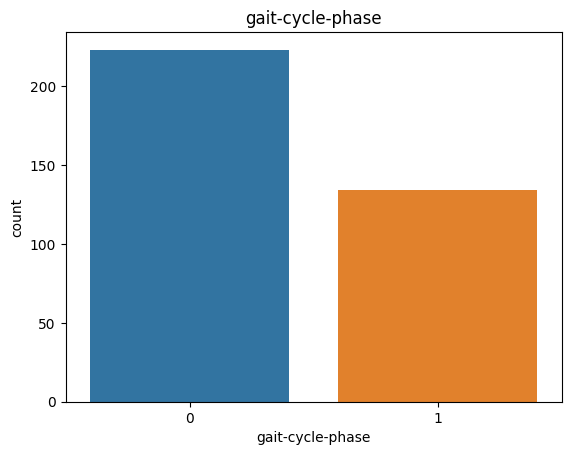

In [158]:
sns.countplot(x = df['gait-cycle-phase'])
plt.title('gait-cycle-phase')

array([[<Axes: title={'center': 'knee-angle'}>,
        <Axes: title={'center': 'hip-angle'}>],
       [<Axes: title={'center': 'ankle-angle'}>,
        <Axes: title={'center': 'gait-cycle-phase'}>]], dtype=object)

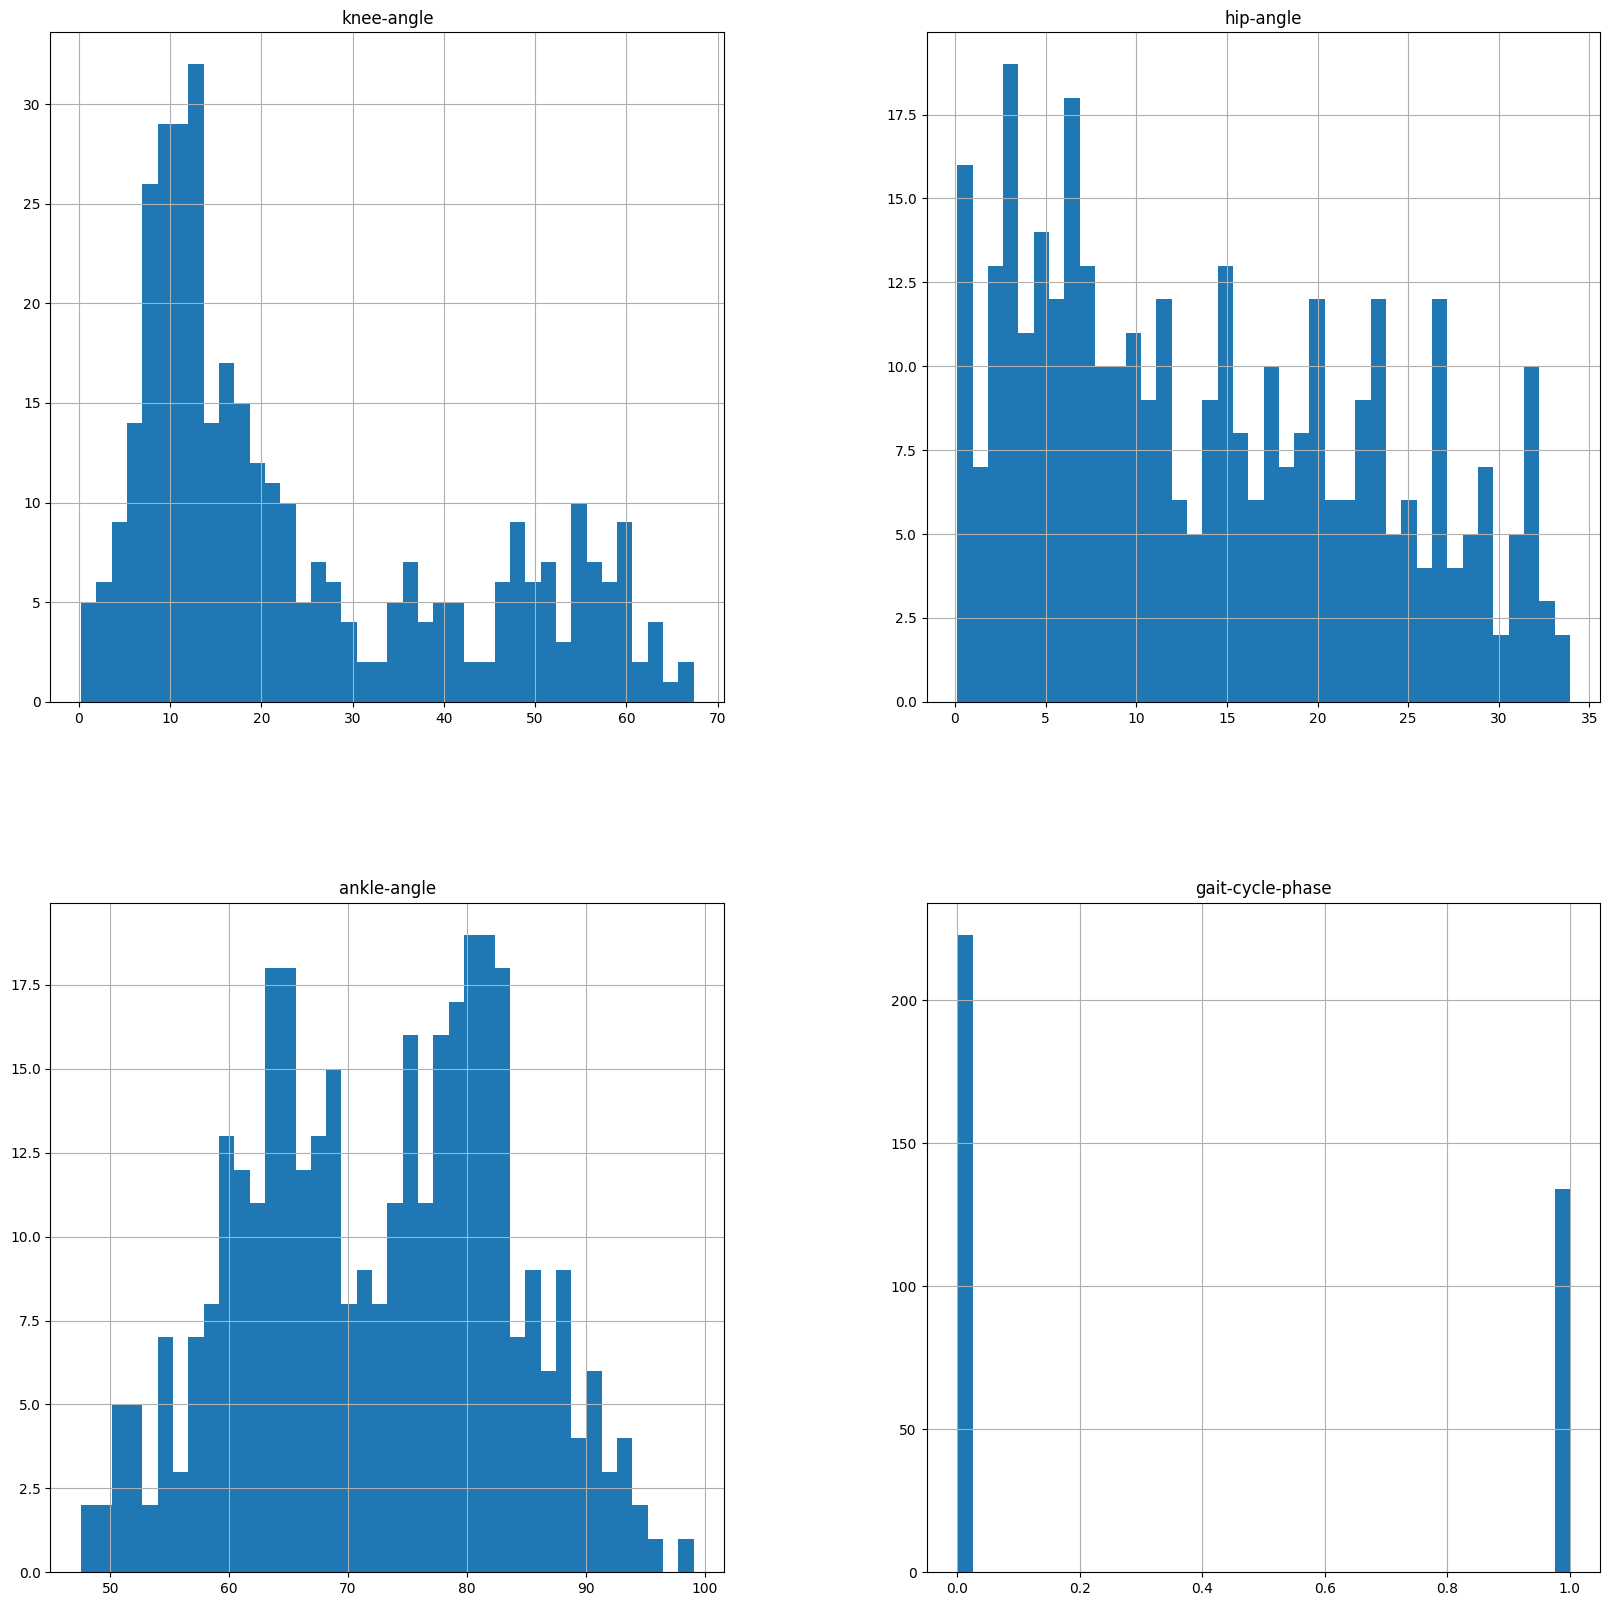

In [159]:
df.hist(bins = 40, figsize = (20,20))

<Axes: >

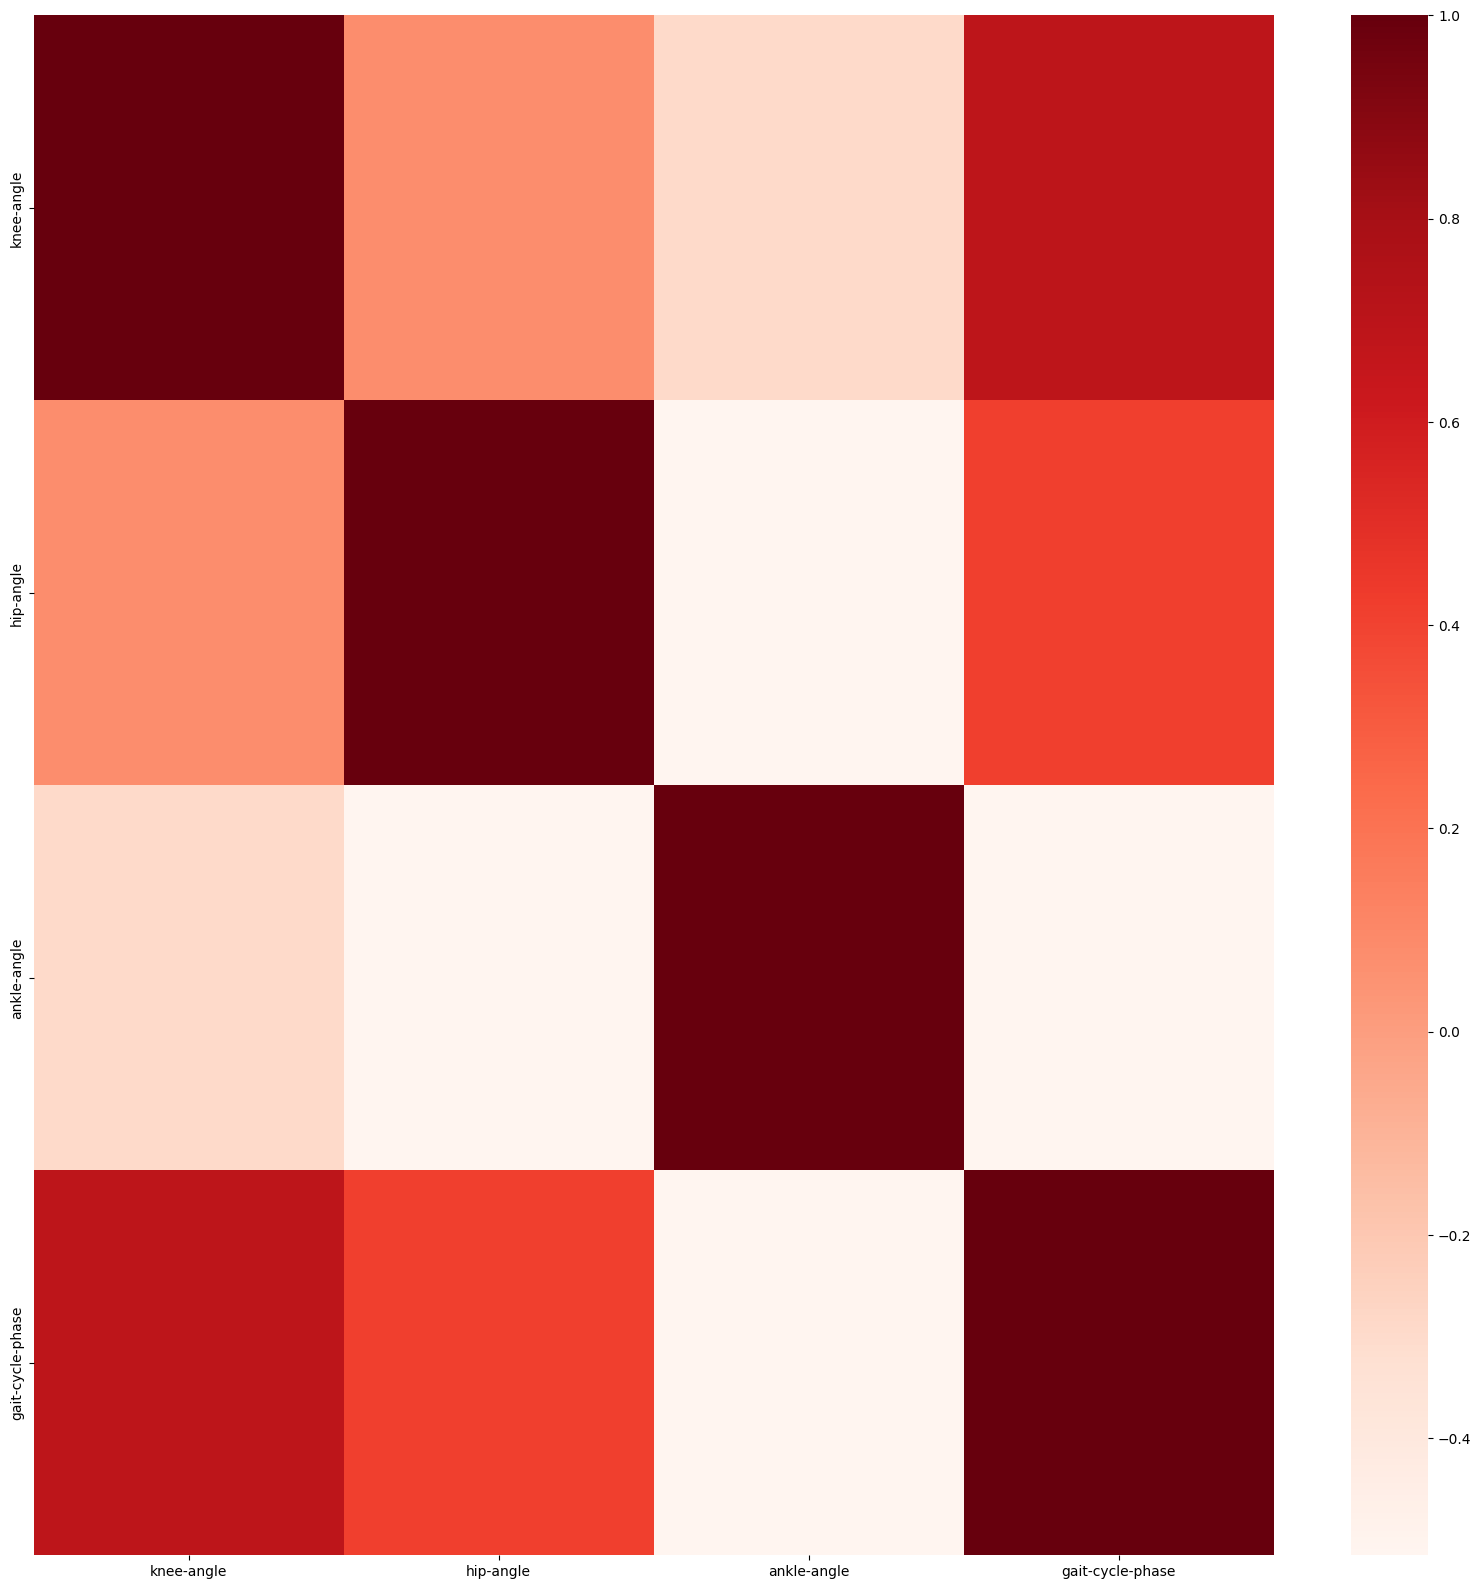

In [160]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), cmap = 'Reds')

In [163]:
def preprocess(df):
    X = df.drop(['gait-cycle-phase'], axis=1)

    y = df['gait-cycle-phase']

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=2)
    
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [164]:
X_train, X_test, y_train, y_test = preprocess(df)

In [165]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((285, 3), (72, 3), (285,), (72,))

In [166]:
y_test.value_counts() / len(y_test)

0    0.680556
1    0.319444
Name: gait-cycle-phase, dtype: float64

In [167]:
var_models = {
    "Logistic Regression": LogisticRegression(solver = "liblinear", l1_ratio = 0.4),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance', metric='euclidean'),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (LinearSVC)": LinearSVC(C = 0.3),
    "Support Vector Machine (kernel SVM)": SVC(kernel = 'rbf', random_state = 0),
    "MLPClassifier": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(loss = "exponential"),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators = 60, learning_rate = 0.2),
    "XgBoost Classifier": XGB.XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

for name, model in var_models.items():
  model.fit(X_train, y_train)
  print(name + ' was completed.')

Logistic Regression was completed.
K-Nearest Neighbors was completed.
Decision Tree was completed.
Support Vector Machine (LinearSVC) was completed.
Support Vector Machine (kernel SVM) was completed.
MLPClassifier was completed.
Random Forest was completed.
Gradient Boosting was completed.
AdaBoost Classifier was completed.
XgBoost Classifier was completed.
Learning rate set to 0.006028
0:	learn: 0.6859427	total: 1.72ms	remaining: 1.72s
1:	learn: 0.6772426	total: 3.27ms	remaining: 1.63s
2:	learn: 0.6692738	total: 4.75ms	remaining: 1.58s
3:	learn: 0.6621719	total: 7.05ms	remaining: 1.76s
4:	learn: 0.6545464	total: 8.92ms	remaining: 1.77s
5:	learn: 0.6470645	total: 12.2ms	remaining: 2.02s
6:	learn: 0.6396764	total: 14.1ms	remaining: 2s
7:	learn: 0.6327286	total: 16.9ms	remaining: 2.09s
8:	learn: 0.6247888	total: 18.6ms	remaining: 2.05s
9:	learn: 0.6171775	total: 21.9ms	remaining: 2.17s
10:	learn: 0.6105572	total: 24.4ms	remaining: 2.19s
11:	learn: 0.6040024	total: 25.6ms	remaining: 2.1s


In [168]:
var_results = []

for name, model in var_models.items():
  results = model.score(X_test, y_test)
  var_results.append(results)

  print('----------     '+name+'     ----------')

  model = var_models[name]
  y_test_pred = model.predict(X_test)
  print(metrics.classification_report(y_test_pred, y_test))
  print(name + ': {:.4f}%'.format(results * 100))
  print('Accuracy :{0:0.4f}'.format(metrics.accuracy_score(y_test_pred , y_test))) 
  print('AUC : {0:0.4f}'.format(metrics.roc_auc_score(y_test_pred , y_test)))
  print('Precision : {0:0.4f}'.format(metrics.precision_score(y_test_pred , y_test)))
  print('Recall : {0:0.4f}'.format(metrics.recall_score(y_test_pred , y_test)))
  print('F1 : {0:0.4f}'.format(metrics.f1_score(y_test_pred , y_test)))

----------     Logistic Regression     ----------
              precision    recall  f1-score   support

           0       0.86      0.98      0.91        43
           1       0.96      0.76      0.85        29

    accuracy                           0.89        72
   macro avg       0.91      0.87      0.88        72
weighted avg       0.90      0.89      0.89        72

Logistic Regression: 88.8889%
Accuracy :0.8889
AUC : 0.8677
Precision : 0.9565
Recall : 0.7586
F1 : 0.8462
----------     K-Nearest Neighbors     ----------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1       0.96      0.88      0.92        25

    accuracy                           0.94        72
   macro avg       0.95      0.93      0.94        72
weighted avg       0.94      0.94      0.94        72

K-Nearest Neighbors: 94.4444%
Accuracy :0.9444
AUC : 0.9294
Precision : 0.9565
Recall : 0.8800
F1 : 0.9167
----------     Decision Tree    

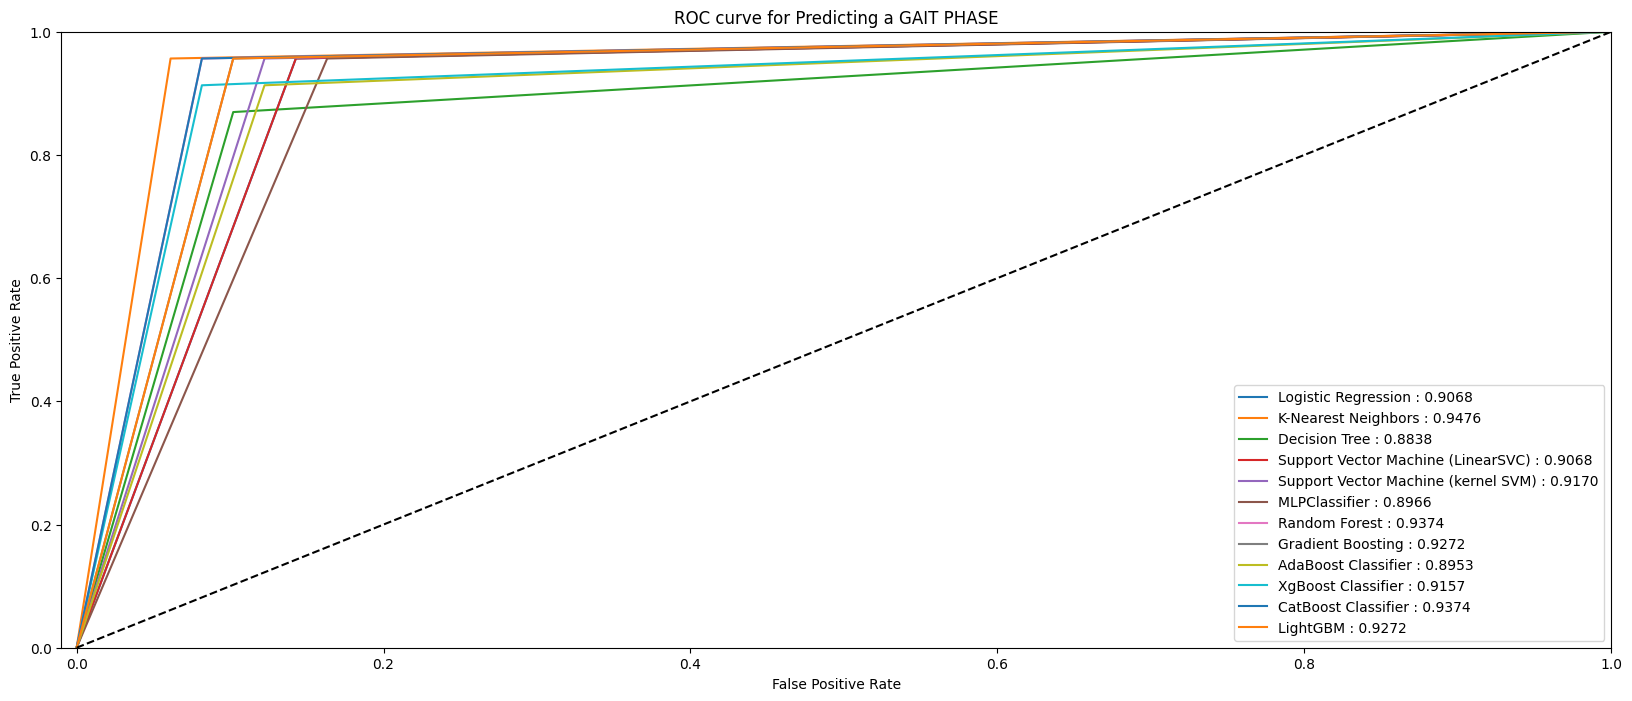

In [169]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)

for i in var_models:
    y_pred = var_models[i].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    precision, recall, th = precision_recall_curve(y_test, y_pred,pos_label=1)
    plt.plot(fpr, tpr, label= i + ' : {:.4f}'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0,1], [0,1], 'k--' )
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Predicting a GAIT PHASE')
plt.legend(loc=4)
plt.show()


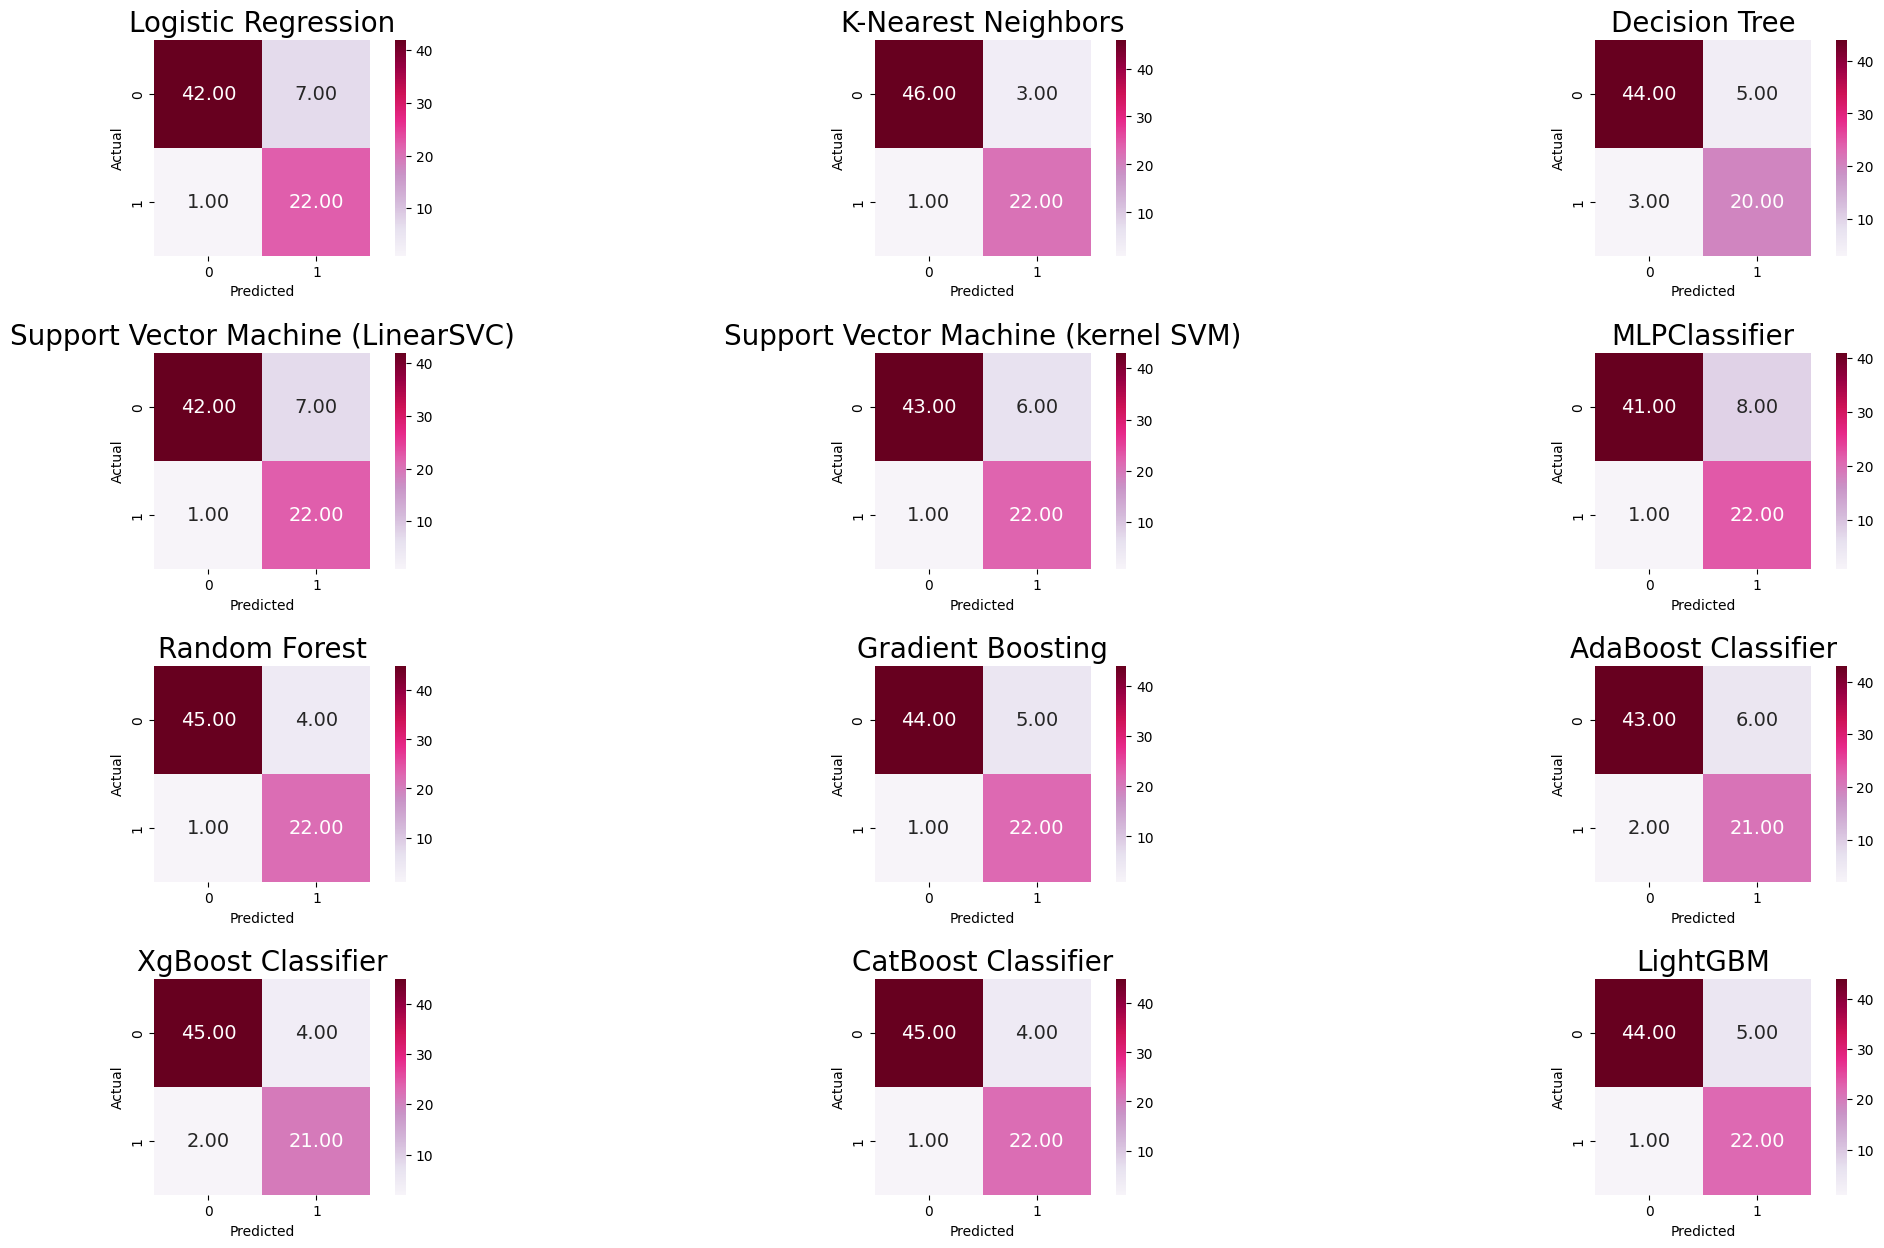

In [170]:
a = 1

fig = plt.figure(figsize=(25,15))

for name, model in var_models.items():
    results = model.score(X_test, y_test)
    model = var_models[name]
    y_test_pred = model.predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}

    conf_mx = confusion_matrix(y_test, y_test_pred)

    heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_test), index = np.unique(y_test))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'

    plt.subplot(4, 3, a)
    fig.subplots_adjust(wspace=0.45, hspace= 0.45)
    sns.heatmap(heat_cm, annot=True, fmt='.2f', square=True, annot_kws={"size": 14}, cmap = 'PuRd').set_title(name, fontsize = 20)
    a = a + 1

plt.show()

In [174]:
def preprocess(df):
    X = df.drop(['gait-cycle-phase'], axis=1)

    y = df['gait-cycle-phase']

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=2)
      
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
  
    return X_train, X_test, y_train, y_test

In [175]:
X_train, X_test, y_train, y_test = preprocess(df)

In [176]:
sm = SMOTE(random_state = 42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'gait-cycle-phase')

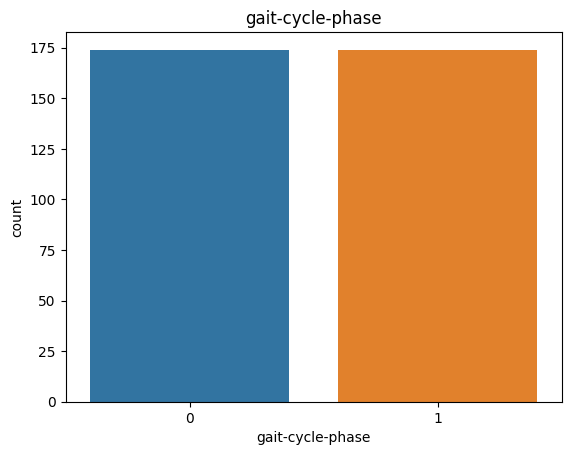

In [177]:
sns.countplot(x = y_train_smote)
plt.title('gait-cycle-phase')

In [178]:
var_models_smote = {
    "Logistic Regression": LogisticRegression(solver = "liblinear", l1_ratio = 0.4),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance', metric='euclidean'),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (LinearSVC)": LinearSVC(C = 0.3),
    "Support Vector Machine (SVC)": SVC(),
    "MLPClassifier": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(loss = "exponential"),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators = 60, learning_rate = 0.2),
    "XgBoost Classifier": XGB.XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

for name, model in var_models_smote.items():
  model.fit(X_train_smote, y_train_smote)
  print(name + ' was completed.')

Logistic Regression was completed.
K-Nearest Neighbors was completed.
Decision Tree was completed.
Support Vector Machine (LinearSVC) was completed.
Support Vector Machine (SVC) was completed.
MLPClassifier was completed.
Random Forest was completed.
Gradient Boosting was completed.
AdaBoost Classifier was completed.
XgBoost Classifier was completed.
Learning rate set to 0.006564
0:	learn: 0.6847143	total: 2.16ms	remaining: 2.16s
1:	learn: 0.6754750	total: 5.78ms	remaining: 2.88s
2:	learn: 0.6658509	total: 10.4ms	remaining: 3.44s
3:	learn: 0.6567302	total: 29.5ms	remaining: 7.33s
4:	learn: 0.6483508	total: 34.8ms	remaining: 6.92s
5:	learn: 0.6394962	total: 38.5ms	remaining: 6.38s
6:	learn: 0.6314995	total: 48.3ms	remaining: 6.84s
7:	learn: 0.6233312	total: 51.4ms	remaining: 6.37s
8:	learn: 0.6153243	total: 60.3ms	remaining: 6.64s
9:	learn: 0.6079676	total: 62.3ms	remaining: 6.16s
10:	learn: 0.6000520	total: 65.2ms	remaining: 5.86s
11:	learn: 0.5928384	total: 72ms	remaining: 5.93s
12:	l

In [179]:
var_results_smote = []

for name, model in var_models_smote.items():
  results_smote = model.score(X_test, y_test)
  var_results_smote.append(results_smote)

  print('----------     '+name+'     ----------')

  model = var_models_smote[name]
  y_test_pred_smote = model.predict(X_test)
  print(metrics.classification_report(y_test , y_test_pred_smote))
  print('Accuracy : {:0.4f}'.format(metrics.accuracy_score(y_test , y_test_pred_smote))) 
  print('AUC : {0:0.4f}'.format(metrics.roc_auc_score(y_test , y_test_pred_smote)))
  print('Precision : {0:0.4f}'.format(metrics.precision_score(y_test , y_test_pred_smote)))
  print('Recall : {0:0.4f}'.format(metrics.recall_score(y_test , y_test_pred_smote)))
  print('F1 : {0:0.4f}'.format(metrics.f1_score(y_test , y_test_pred_smote)))

----------     Logistic Regression     ----------
              precision    recall  f1-score   support

           0       0.97      0.78      0.86        49
           1       0.67      0.96      0.79        23

    accuracy                           0.83        72
   macro avg       0.82      0.87      0.82        72
weighted avg       0.88      0.83      0.84        72

Accuracy : 0.8333
AUC : 0.8660
Precision : 0.6667
Recall : 0.9565
F1 : 0.7857
----------     K-Nearest Neighbors     ----------
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        49
           1       0.79      1.00      0.88        23

    accuracy                           0.92        72
   macro avg       0.90      0.94      0.91        72
weighted avg       0.93      0.92      0.92        72

Accuracy : 0.9167
AUC : 0.9388
Precision : 0.7931
Recall : 1.0000
F1 : 0.8846
----------     Decision Tree     ----------
              precision    recall  f1-score   

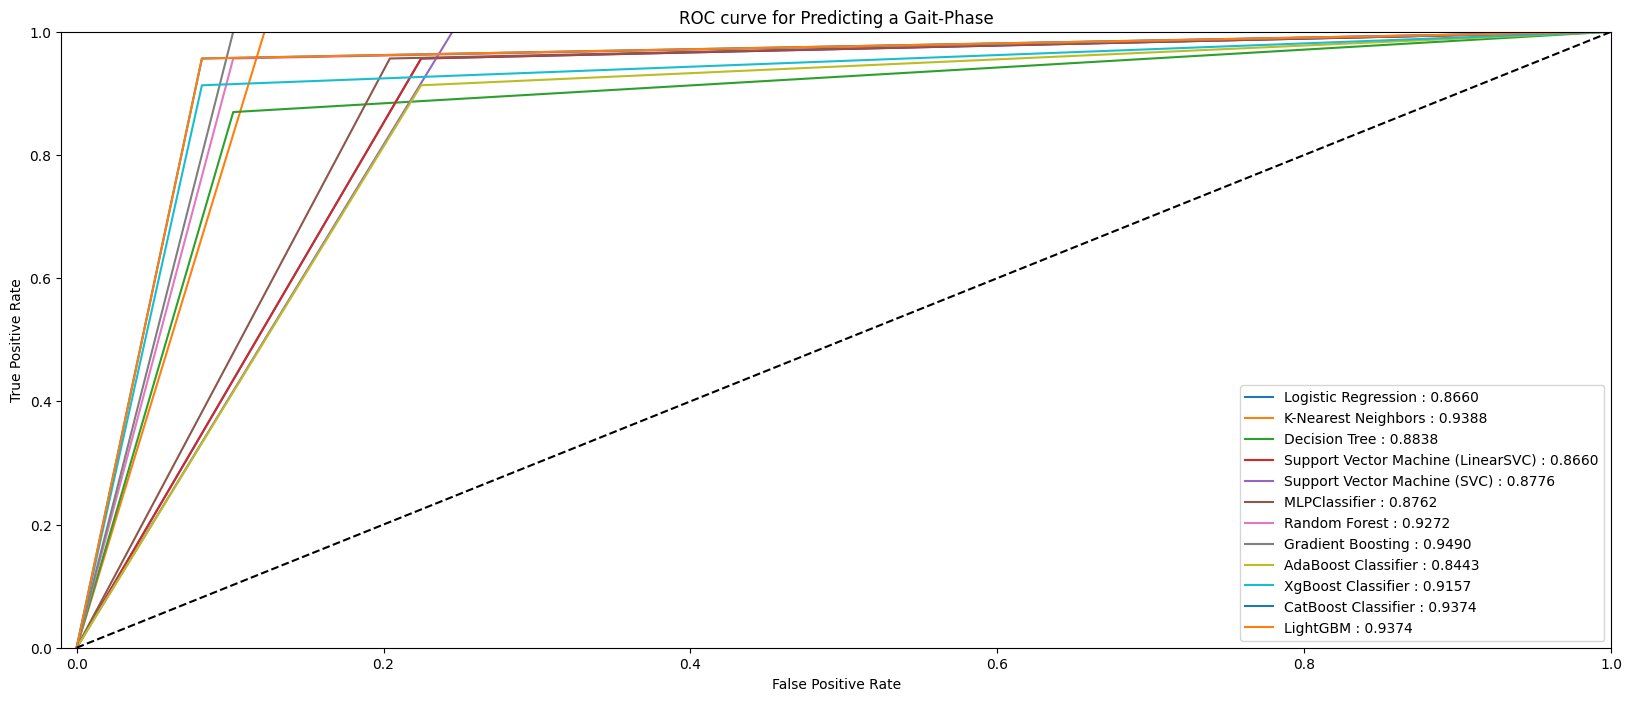

In [180]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)

for i in var_models_smote:
    y_pred = var_models_smote[i].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    precision, recall, th = precision_recall_curve(y_test, y_pred,pos_label=1)
    plt.plot(fpr, tpr, label= i + ' : {:.4f}'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0,1], [0,1], 'k--' )
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Predicting a Gait-Phase')
plt.legend(loc=4)
plt.show()

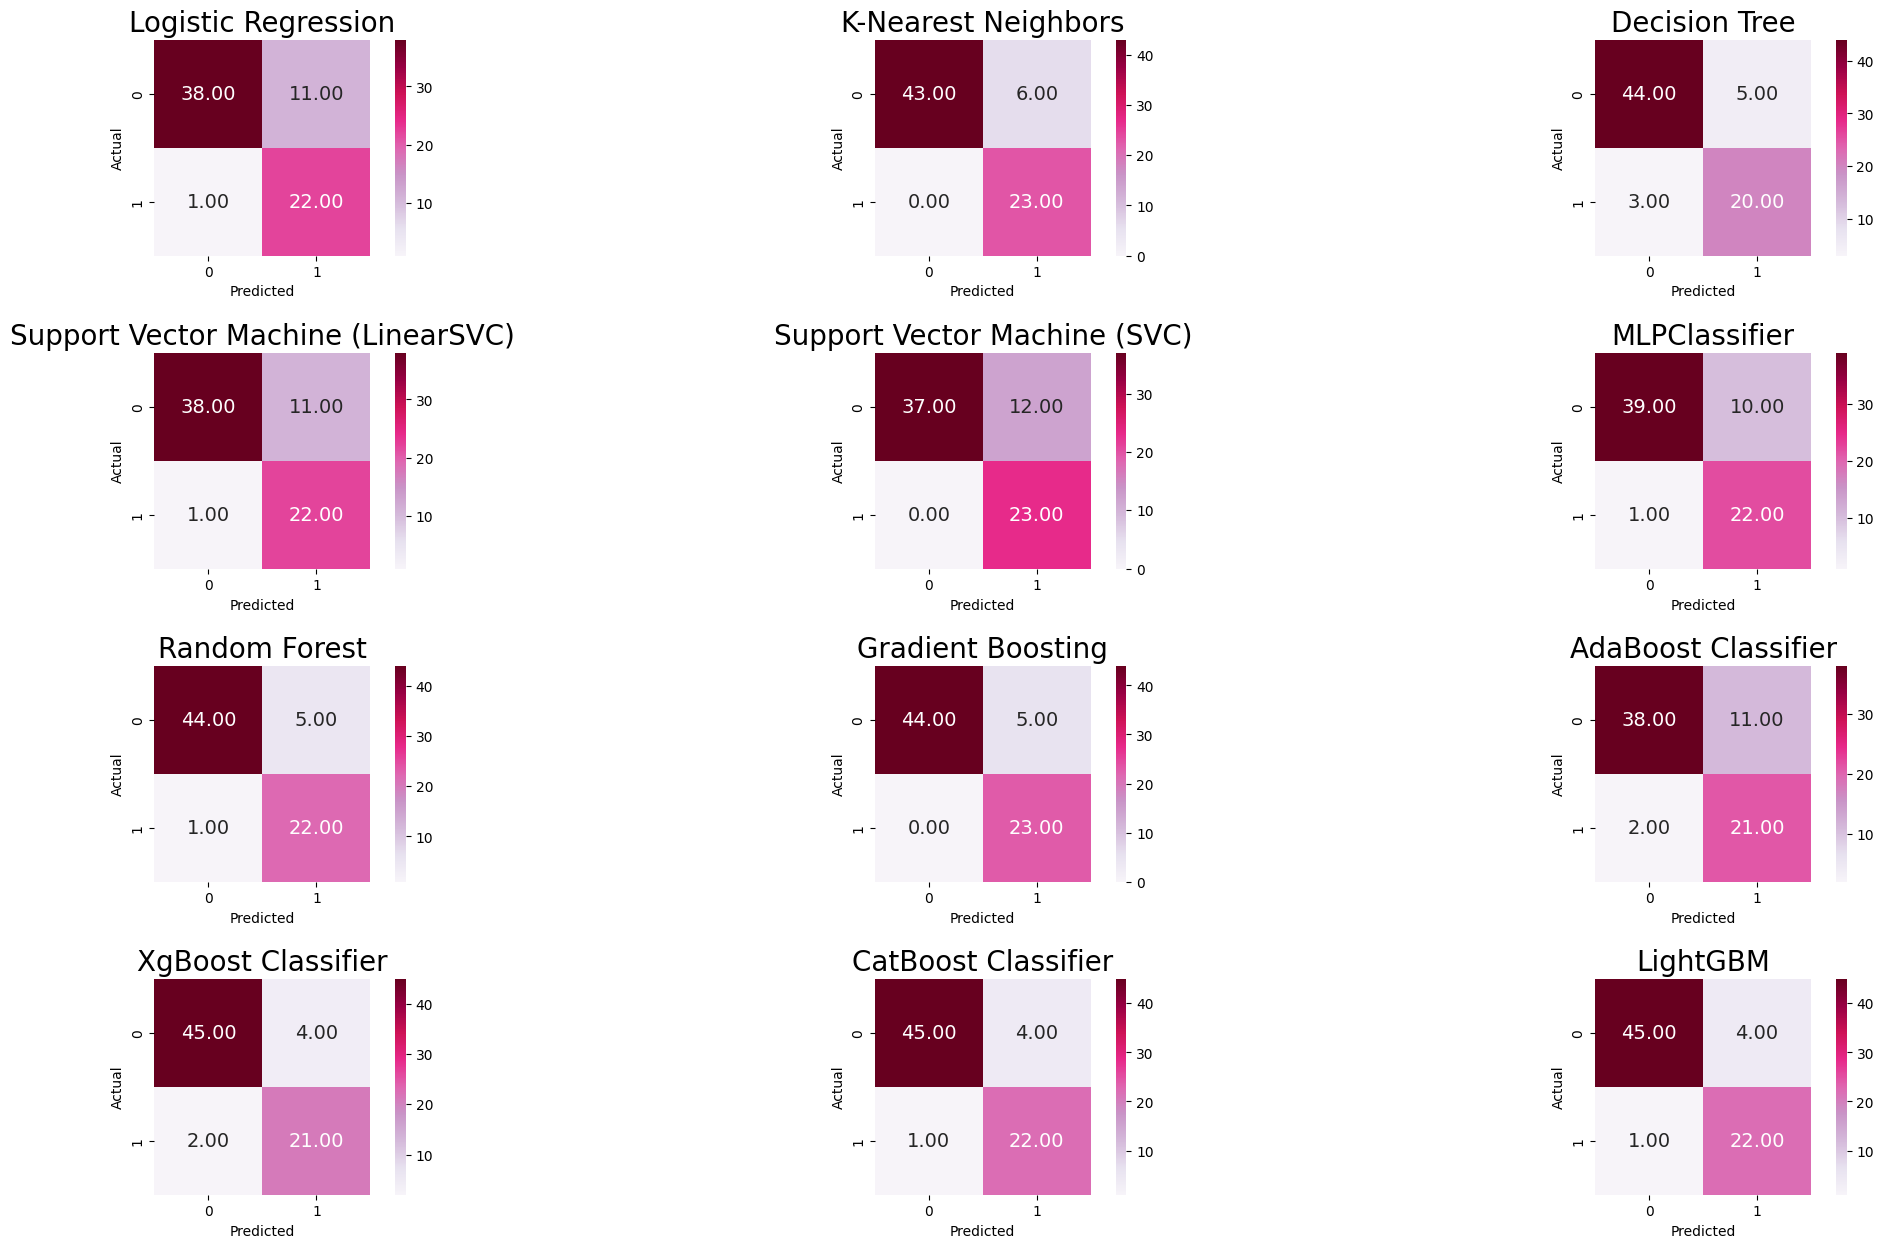

In [181]:
a = 1

fig = plt.figure(figsize=(25,15))

for name, model in var_models_smote.items():
    results = model.score(X_test, y_test)
    model = var_models_smote[name]
    y_test_pred = model.predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}

    conf_mx = confusion_matrix(y_test, y_test_pred)

    heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_test), index = np.unique(y_test))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'

    plt.subplot(4, 3, a)
    fig.subplots_adjust(wspace=0.45, hspace= 0.45)
    sns.heatmap(heat_cm, annot=True, fmt='.2f', square=True, annot_kws={"size": 14}, cmap = 'PuRd').set_title(name, fontsize = 20)
    a = a + 1


In [185]:
def preprocess(df):
    X = df.drop(['gait-cycle-phase'], axis=1)

    y = df['gait-cycle-phase']


    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=2)
      
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
  
    return X_train, X_test, y_train, y_test

In [186]:
X_train, X_test, y_train, y_test = preprocess(df)

In [187]:
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'phase')

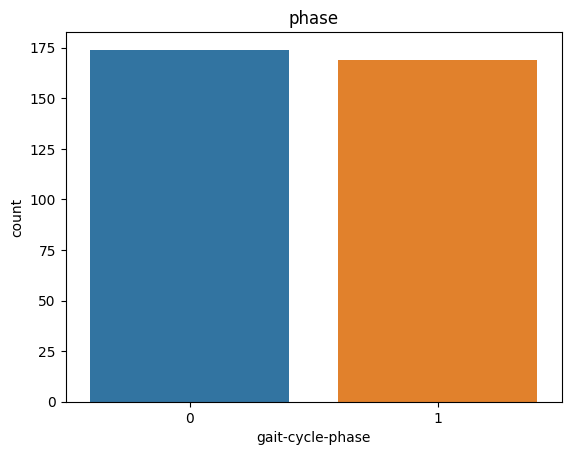

In [188]:
sns.countplot(x = y_train_adasyn)
plt.title('phase')

In [189]:
var_models_adasyn = {
    "Logistic Regression": LogisticRegression(solver = "liblinear", l1_ratio = 0.4),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance', metric='euclidean'),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (LinearSVC)": LinearSVC(C = 0.3),
    "Support Vector Machine (SVC)": SVC(),
    "MLPClassifier": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(loss = "exponential"),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators = 60, learning_rate = 0.2),
    "XgBoost Classifier": XGB.XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

for name, model in var_models_adasyn.items():
  model.fit(X_train_adasyn, y_train_adasyn)
  print(name + ' was completed.')

Logistic Regression was completed.
K-Nearest Neighbors was completed.
Decision Tree was completed.
Support Vector Machine (LinearSVC) was completed.
Support Vector Machine (SVC) was completed.
MLPClassifier was completed.
Random Forest was completed.
Gradient Boosting was completed.
AdaBoost Classifier was completed.
XgBoost Classifier was completed.
Learning rate set to 0.006524
0:	learn: 0.6855159	total: 1.52ms	remaining: 1.52s
1:	learn: 0.6772979	total: 2.85ms	remaining: 1.42s
2:	learn: 0.6702058	total: 4.37ms	remaining: 1.45s
3:	learn: 0.6619746	total: 5.9ms	remaining: 1.47s
4:	learn: 0.6547956	total: 7.35ms	remaining: 1.46s
5:	learn: 0.6468099	total: 8.79ms	remaining: 1.46s
6:	learn: 0.6393844	total: 10.5ms	remaining: 1.49s
7:	learn: 0.6322105	total: 12.4ms	remaining: 1.53s
8:	learn: 0.6242885	total: 13.8ms	remaining: 1.52s
9:	learn: 0.6169006	total: 15.8ms	remaining: 1.56s
10:	learn: 0.6101562	total: 17.2ms	remaining: 1.55s
11:	learn: 0.6028021	total: 18.7ms	remaining: 1.54s
12:	

In [190]:
var_results_adasyn = []

for name, model in var_models_adasyn.items():
  results_adasyn = model.score(X_test, y_test)
  var_results_adasyn.append(results_adasyn)

  print('----------     '+name+'     ----------')

  model = var_models_adasyn[name]
  y_test_pred_adasyn = model.predict(X_test)
  print(metrics.classification_report(y_test , y_test_pred_adasyn))
  print('Accuracy : {:0.4f}'.format(metrics.accuracy_score(y_test , y_test_pred_adasyn))) 
  print('AUC : {0:0.4f}'.format(metrics.roc_auc_score(y_test , y_test_pred_adasyn)))
  print('Precision : {0:0.4f}'.format(metrics.precision_score(y_test , y_test_pred_adasyn)))
  print('Recall : {0:0.4f}'.format(metrics.recall_score(y_test , y_test_pred_adasyn)))
  print('F1 : {0:0.4f}'.format(metrics.f1_score(y_test , y_test_pred_adasyn)))

----------     Logistic Regression     ----------
              precision    recall  f1-score   support

           0       0.97      0.76      0.85        49
           1       0.65      0.96      0.77        23

    accuracy                           0.82        72
   macro avg       0.81      0.86      0.81        72
weighted avg       0.87      0.82      0.83        72

Accuracy : 0.8194
AUC : 0.8558
Precision : 0.6471
Recall : 0.9565
F1 : 0.7719
----------     K-Nearest Neighbors     ----------
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        49
           1       0.79      1.00      0.88        23

    accuracy                           0.92        72
   macro avg       0.90      0.94      0.91        72
weighted avg       0.93      0.92      0.92        72

Accuracy : 0.9167
AUC : 0.9388
Precision : 0.7931
Recall : 1.0000
F1 : 0.8846
----------     Decision Tree     ----------
              precision    recall  f1-score   

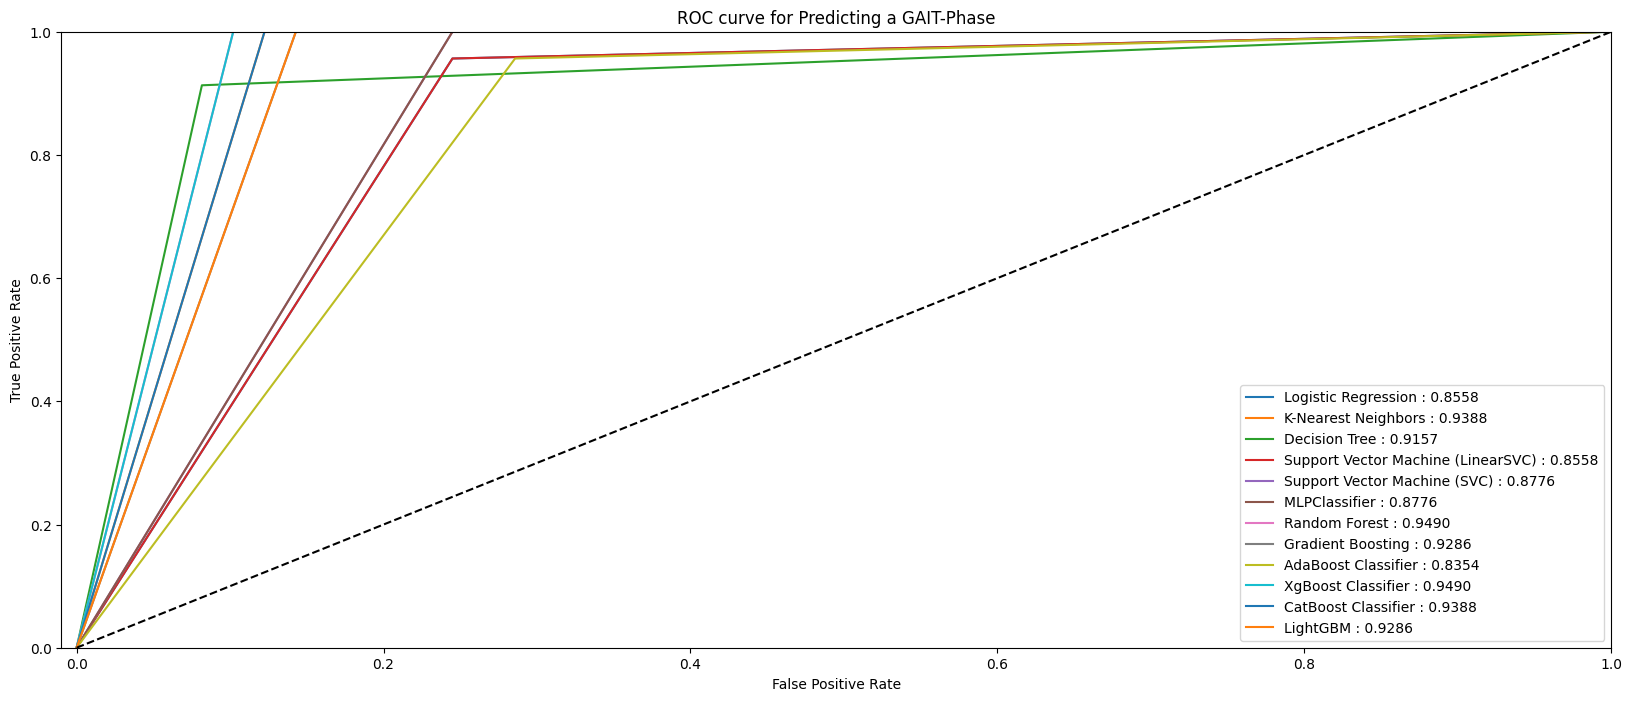

In [191]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)

for i in var_models_adasyn:
    y_pred = var_models_adasyn[i].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    precision, recall, th = precision_recall_curve(y_test, y_pred,pos_label=1)
    plt.plot(fpr, tpr, label= i + ' : {:.4f}'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0,1], [0,1], 'k--' )
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Predicting a GAIT-Phase')
plt.legend(loc=4)
plt.show()

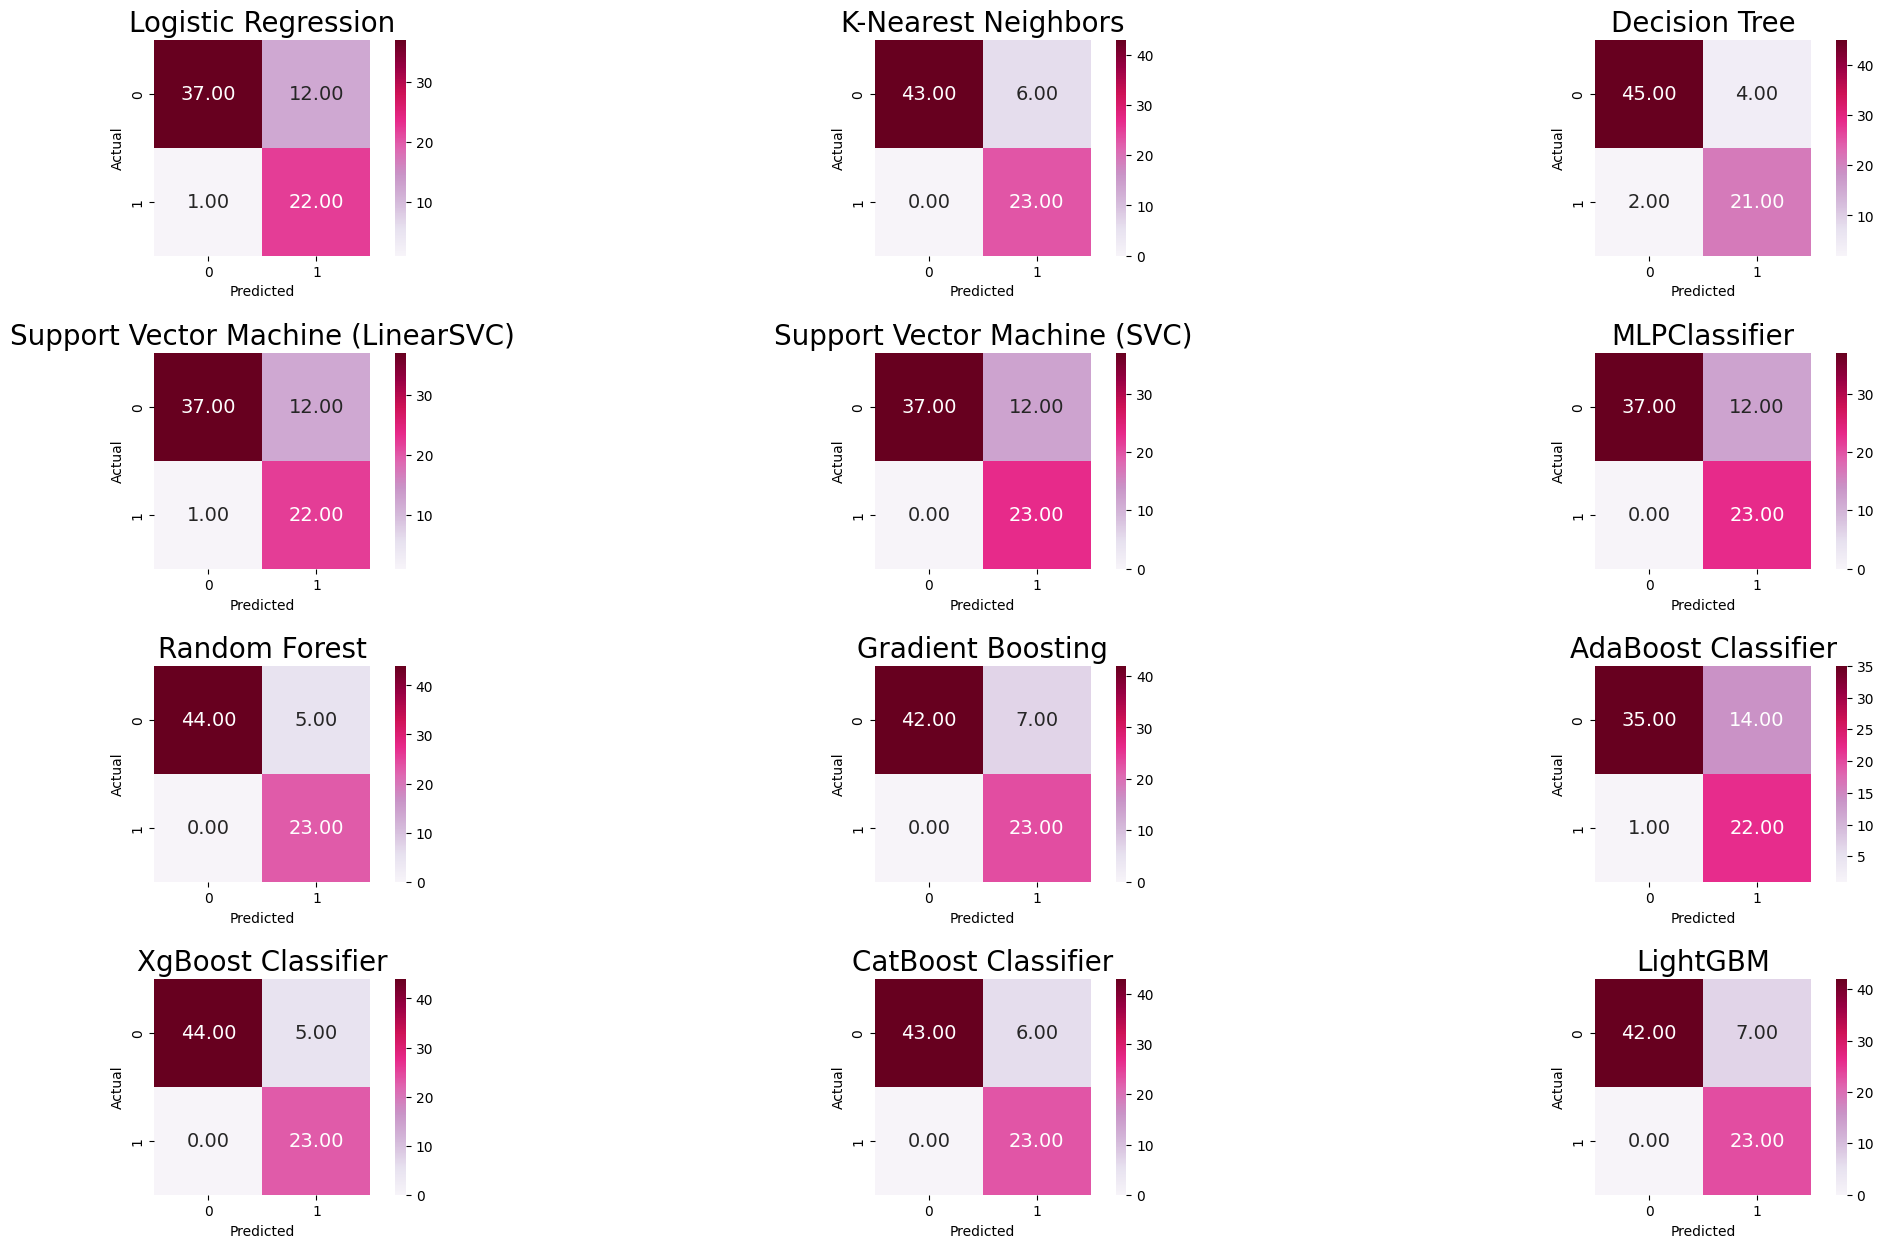

In [192]:
a = 1

fig = plt.figure(figsize=(25,15))

for name, model in var_models_adasyn.items():
    results = model.score(X_test, y_test)
    model = var_models_adasyn[name]
    y_test_pred = model.predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}

    conf_mx = confusion_matrix(y_test, y_test_pred)

    heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_test), index = np.unique(y_test))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'

    plt.subplot(4, 3, a)
    fig.subplots_adjust(wspace=0.45, hspace= 0.45)
    sns.heatmap(heat_cm, annot=True, fmt='.2f', square=True, annot_kws={"size": 14}, cmap = 'PuRd').set_title(name, fontsize = 20)
    a = a + 1

plt.show()